In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [5]:
n_pts = 500 #number of points
centers = [[-1, 1], [-1, -1], [1, -1]] # the 3 centers of clusters
X, y = datasets.make_blobs(n_samples=n_pts, 
                           random_state=123, 
                           centers=centers,
                           cluster_std = 0.4) 
#cluster_std: cluster standard deviation: the distance between points, or distribution between points

In [6]:
print(X)
print(y)

[[ 0.95219249 -0.60923137]
 [ 1.65952714 -0.31381256]
 [ 0.526137   -0.94160831]
 [-1.41959667  0.96995176]
 [-0.94002647 -0.78014296]
 [-1.60724319  0.81552503]
 [-0.82564969  0.8724172 ]
 [ 0.88319833 -1.0467727 ]
 [ 1.72626083 -1.10110012]
 [ 1.42796744 -1.36373081]
 [-0.91416557 -1.16086389]
 [-0.61034703 -0.93588251]
 [-1.58604649  1.14537822]
 [-0.44909701  0.94272961]
 [-0.59427845 -1.68359671]
 [ 0.28538926 -1.0609578 ]
 [ 1.63020037 -0.86777469]
 [ 1.74338976 -0.9765849 ]
 [ 1.02112227 -1.64830079]
 [-1.40786203  1.06717692]
 [ 0.73537974 -1.37188465]
 [-0.53991778  0.49305918]
 [-0.83445477 -0.98106325]
 [ 0.80705387 -0.56808146]
 [-1.16056577 -0.73060349]
 [ 0.67184979 -1.2490654 ]
 [-0.25482897  1.3340235 ]
 [-0.8742912   0.46949382]
 [ 1.57943063 -0.64311997]
 [-0.83355047 -1.05312047]
 [-1.17586888 -0.56471181]
 [-1.15029996  0.44811001]
 [-1.50155227  0.7448994 ]
 [ 1.27281391 -0.88137737]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [ 0.51922533 -1.18831422]
 

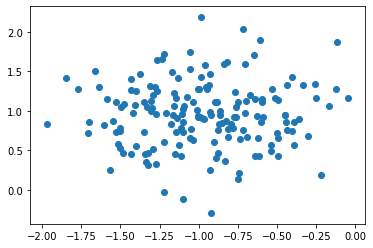

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1])

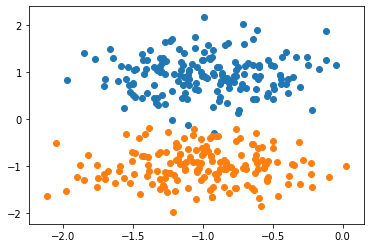

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

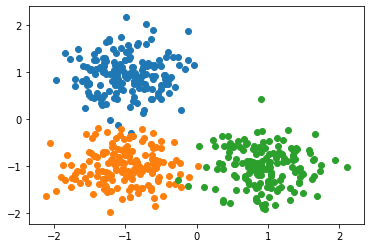

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
print(y)
y_cat = to_categorical(y, 3) # 3 centers
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [12]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2, ), activation= 'softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
 model.fit(x=X, y=y_cat, verbose =1, batch_size = 50, epochs = 100)

Epoch 1/100
500/500 [==============================] - 0s 27us/step - loss: 0.2168 - accuracy: 0.9880
Epoch 2/100
500/500 [==============================] - 0s 22us/step - loss: 0.1263 - accuracy: 0.9880
Epoch 3/100
500/500 [==============================] - 0s 22us/step - loss: 0.0934 - accuracy: 0.9880
Epoch 4/100
500/500 [==============================] - 0s 22us/step - loss: 0.0810 - accuracy: 0.9880
Epoch 5/100
500/500 [==============================] - 0s 21us/step - loss: 0.0734 - accuracy: 0.9880
Epoch 6/100
500/500 [==============================] - 0s 21us/step - loss: 0.0678 - accuracy: 0.9880
Epoch 7/100
500/500 [==============================] - 0s 21us/step - loss: 0.0642 - accuracy: 0.9880
Epoch 8/100
500/500 [==============================] - 0s 24us/step - loss: 0.0608 - accuracy: 0.9880
Epoch 9/100
500/500 [==============================] - 0s 21us/step - loss: 0.0581 - accuracy: 0.9880
Epoch 10/100
500/500 [==============================] - 0s 19us/step - loss: 0.055

500/500 [==============================] - 0s 19us/step - loss: 0.0280 - accuracy: 0.9900
Epoch 81/100
500/500 [==============================] - 0s 18us/step - loss: 0.0278 - accuracy: 0.9900
Epoch 82/100
500/500 [==============================] - 0s 19us/step - loss: 0.0280 - accuracy: 0.9900
Epoch 83/100
500/500 [==============================] - 0s 21us/step - loss: 0.0281 - accuracy: 0.9900
Epoch 84/100
500/500 [==============================] - 0s 20us/step - loss: 0.0275 - accuracy: 0.9900
Epoch 85/100
500/500 [==============================] - 0s 20us/step - loss: 0.0281 - accuracy: 0.9900
Epoch 86/100
500/500 [==============================] - 0s 20us/step - loss: 0.0279 - accuracy: 0.9900
Epoch 87/100
500/500 [==============================] - 0s 17us/step - loss: 0.0273 - accuracy: 0.9900
Epoch 88/100
500/500 [==============================] - 0s 20us/step - loss: 0.0273 - accuracy: 0.9900
Epoch 89/100
500/500 [==============================] - 0s 22us/step - loss: 0.0274 - 

In [19]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)# use predict_classes instead of predict because this is multi_class
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

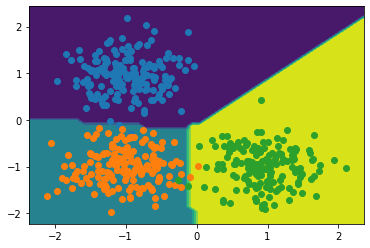

In [20]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

prediction is :  [2]


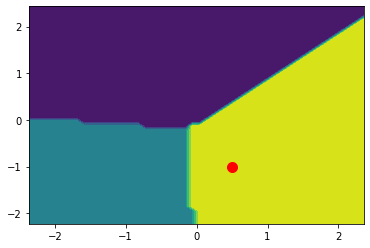

In [23]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
#--------------------
x = 0.5
y = -1
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize= 10, color="red")
print("prediction is : ", prediction)